# Calculate along flow slopes & Export

This process takes in ICESat2 ATL06 slope data, and then projects onto the direction of ice flow. This data is then visualized.

## Import Dependencies

The imports from directory `ICESat2GroundingLineMigration` can be found on [GitHub](https://github.com/Nacnud04/ICESat2-GroundingLineMigration)

In [1]:
import ICESat2GroundingLineMigration.IceSatHDF5Unpacker as unpack
import ICESat2GroundingLineMigration.GLineUnpacker as gline
import ICESat2GroundingLineMigration.FlowUnpacker as flow
import ICESat2GroundingLineMigration.Visualizations as visualize
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import fiona
from math import sqrt, floor

/home/jovyan/GLine-Mig/ICESat2GroundingLineMigration/IceSatHDF5Unpacker.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Set Up Data Grab from Desired Region

This develops a querty for ICESat2 ATL06 data using `icepyx` and `s3fs`. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
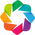

In [2]:
import icepyx as ipx
import s3fs
import earthaccess

# Specifying the necessary icepyx parameters
short_name = 'ATL06'
spatial_extent = 'Bounds/bungen.gpkg' # KML polygon
#rgts = [56, 559, 574, 635, 1062, 1077, 1101]
#cycles = list(range(1, 19))
cycles = list(range(14, 15))

# Setup the Query object
region = ipx.Query(short_name, spatial_extent, cycles=cycles)

In [3]:

# Grabbing granule s3 urls
gran_ids = region.avail_granules(ids=True, cloud=True)
print(f"Found {len(gran_ids[0])} granules")

data_dict = {}
for gran in gran_ids[0]:
    sect = gran.split("_")[-3]
    rgt = sect[0:4]
    cyc = sect[4:6]
    if rgt not in data_dict.keys():
        data_dict[rgt] = [cyc]
    else:
        data_dict[rgt].append(cyc)

print(f"key: cycles contained")
for key in sorted(data_dict.keys()):
    print(f"{key}: {data_dict[key]}")

# Establish credentials
EARTHDATA_USERNAME = "byrne"
EARTHDATA_EMAIL = "byrne@mines.edu"

Found 91 granules
key: cycles contained
0010: ['14']
0034: ['14']
0056: ['14']
0071: ['14']
0080: ['14']
0095: ['14']
0117: ['14']
0132: ['14']
0141: ['14']
0156: ['14']
0178: ['14']
0193: ['14']
0202: ['14']
0239: ['14']
0254: ['14']
0278: ['14']
0293: ['14']
0300: ['14']
0315: ['14']
0330: ['14']
0339: ['14']
0354: ['14']
0361: ['14']
0376: ['14']
0391: ['14']
0400: ['14']
0415: ['14']
0422: ['14']
0437: ['14']
0452: ['14']
0461: ['14']
0476: ['14']
0498: ['14']
0513: ['14']
0522: ['14']
0537: ['14']
0559: ['14']
0574: ['14']
0598: ['14']
0620: ['14']
0635: ['14']
0644: ['14']
0659: ['14']
0681: ['14']
0696: ['14']
0705: ['14']
0720: ['14']
0742: ['14']
0757: ['14']
0796: ['14']
0803: ['14']
0818: ['14']
0833: ['14']
0842: ['14']
0857: ['14']
0864: ['14']
0879: ['14']
0894: ['14']
0903: ['14']
0918: ['14']
0940: ['14']
0955: ['14']
0964: ['14']
0979: ['14']
1001: ['14']
1016: ['14']
1025: ['14']
1040: ['14']
1062: ['14']
1077: ['14']
1086: ['14']
1101: ['14']
1123: ['14']
1138: ['14'

### Credentials
> If the amount of time which it takes to process all the data is too long, the key will timeout. This means that roughly every 75 files (more or less depending on internet speed) the key needs to be refreshed. This returns an `s3fs.S3FileSystem` object which can be returned into the data base class: `ICESat2GroundingLineMigration.IceSatHDF5Unpacker.Database`

In [4]:
# grab creds
def grab_creds():
    
    region.earthdata_login(EARTHDATA_USERNAME, EARTHDATA_EMAIL, s3token=True)
    
    #credentials = region._s3login_credentials
    
    # If the above cell results in an error (specifically a KeyError: 'accessKeyId'), please try this approach instead
    credentials = region._session.get("https://data.nsidc.earthdatacloud.nasa.gov/s3credentials").json()
    
    s3 = s3fs.S3FileSystem(key=credentials['accessKeyId'], secret=credentials['secretAccessKey'], token=credentials['sessionToken'])
    
    return s3

In [5]:
s3 = grab_creds()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
No .netrc found in /home/jovyan


Enter your Earthdata Login username:  byrne
Enter your Earthdata password:  ········


You're now authenticated with NASA Earthdata Login
Using token with expiration date: 09/29/2023
Using user provided credentials for EDL


## Import Altimetry Data, Flow Data, and Grounding Line Data

> Creates a database object at the folder path of `ATL06`. This is where the database's home directory is stated to be. This directory has no effect on future operations in the program as all files are being grabbed via the s3 protocol.

> Additionally, the flowdatabase is imported and all parameters such as angle and angle error of the flow are computed. Due to the size of the dataset this takes significant processing power.

**Requires more than 8GB RAM**

In [6]:
dataset = unpack.Dataset("ATL06") # ICESat-2 ATL06

# import flow database
flowdatabase = flow.Database("Flow/antarctic_ice_vel_phase_map_v01.nc")
flowdatabase.compute_all()

## Grid generation method

#### Simple utility function
> This function finds the nearest value in an array to a given input value. It could likely be highly optimized.

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

### Grid generation method
> This method takes in the bounds of the grid (`xmin`,`ymin`,`xmax`,`ymax`), the cells along the yaxis `ncellsy`, the flow angle array `flowangles`, and the flow error `flowerr` and returns a smaller grid which is a replica of the original flow dataset. This is useful as it can output at any lower resolution for faster processing, and also removes all of the unnecessary data outside of the study area.

In [8]:
def generateGrid(xmin, ymin, xmax, ymax, ncellsy, flowx, flowy, flowangles, flowerr):
    
    cell_size = (ymax-ymin)/ncellsy
    print(f"cell_size = {cell_size}")
    
    # create the cells in a loop
    grid_cells = []
    angles = []
    err = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            # bounds
            x1 = x0-cell_size
            y1 = y0+cell_size
            ix = find_nearest(flowx, x0)
            iy = find_nearest(flowy, y0)
            grid_cells.append(shapely.geometry.box(x0, y0, x1, y1))
            angles.append(flowangles[int(iy),int(ix)])
            err.append(flowerr[int(iy), int(ix)])
    cells = gpd.GeoDataFrame({"geometry":grid_cells, "angle":angles, "angle_err":err}, geometry = "geometry", crs=proj4_crs)
    
    return cells

## Generate Grid

### Define bounds for geometry

* `proj4_crs` defines the coordinate proj4 string for what to generate the grid in
* The next 4 lines capture the bounds of the kml file defining which granules were grabbed.
* `xlim` and `ylim` is then generated from this

In [9]:
proj4_crs = "+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"

# gen x and y lim from bounds.kml
# Open KML file for use
boundsgdf = gpd.read_file(spatial_extent)
boundsgdf = boundsgdf.to_crs(proj4_crs)
mask = boundsgdf["geometry"].iloc[0]
ylim = (boundsgdf["geometry"].total_bounds[1], boundsgdf["geometry"].total_bounds[3])
xlim = (boundsgdf["geometry"].total_bounds[0], boundsgdf["geometry"].total_bounds[2])
print(f"xlim: {xlim}")
print(f"ylim: {ylim}")

xlim: (-992774.0563426361, -786958.2298763964)
ylim: (277273.1531876985, 438948.2757544137)


### Generate flow grid

* `cs` defines the cell size in meters. This must be a multiple of the actual grid size of 450m
* We then look for the points on the grid which most closely align with the maxiumum bounds of the mask
* We compute cells on the y side of the grid via $ \frac{fymax-fymin}{cs} $
* The grid is then generated and nan values are dropped.

In [10]:
cs = 450 # cell size in m (must be a mulitple of actual grid size (450*n))

# get nearest values to x and y lim which are on grid
fxmin, fxmax = xlim[0] - xlim[0] % cs, xlim[1] - xlim[1] % cs
fymin, fymax = ylim[0] - ylim[0] % cs, ylim[1] - ylim[1] % cs
print(f"Bounds: {fxmin},{fymin},{fxmax},{fymax}")

# compute cells on the y side
cellsy = (fymax-fymin)/cs

# generate grid of flowdatabase
cell = generateGrid(fxmin, fymin, fxmax, fymax, cellsy, flowdatabase.x, flowdatabase.y,
                    flowdatabase.angle, flowdatabase.angle_error)

cell = cell.dropna()

Bounds: -993150.0,277200.0,-787050.0,438750.0
cell_size = 450.0


### Visualize flowgrid

* Additionally this defines `imbuffsc` which defines the buffer size for all of the plots in the notebook

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


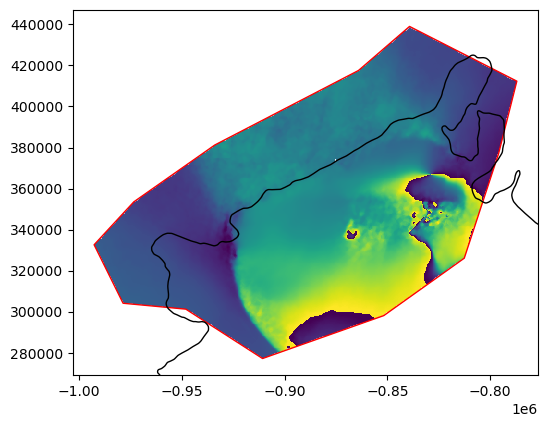

In [11]:
imbuffsc = 0.05

# crop by xlim & ylim
cell = cell.clip(mask)

basemap = unpack.Basemap("BackgroundData/GroundedIce.gpkg")
fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,6))
cell.plot(ax=ax, column="angle", vmin = -1.52, vmax = 1.52)
boundsgdf.plot(ax=ax, color="none", edgecolor="red")
basemap.basemap_gpd.plot(ax=ax, color="none", edgecolor="black")
plt.xlim(xlim[0]-abs(imbuffsc*(xlim[1]-xlim[0])), xlim[1]+abs(imbuffsc*(xlim[1]-xlim[0])))
plt.ylim(ylim[0]-abs(imbuffsc*(ylim[1]-ylim[0])), ylim[1]+abs(imbuffsc*(ylim[1]-ylim[0])))
plt.show()

## Ascending vs. Descending

> ICESat2 can either be **ascending** or **descending**. If the satellite is in one orientation and not the other, then the dh_fit_dx values and dh_fit_dy values will be inverse of the opposite direction. Ascending is defined as if the latitude is increasing, and descending is the opposite. The following method provides a solution for this. Specifically it creates an array where ascending indexes are given a value of `1` and descending `-1`. This then allows a muliplication of the two matricies to apply the correction.

In [12]:
def calc_direction(lat):
    ascending = [1 if lat[i+1] > lat[i] else -1 for i in range(len(lat)-1)]
    ascending.append(ascending[-1])
    return np.array(ascending)

def account_ascending(ascending, dh_fit_dx):
    dh_fit_dx = dh_fit_dx * ascending
    return dh_fit_dx

# Calculating flow slopes

### Only select specific RGT's wanted (optional)

In [13]:
def purge_rgts(rgts, links=gran_ids[1]):
    
    final_links = []
    for link in links:
        filename = link.split("/")[-1]
        rgtcycleseg = filename.split("_")[-3]
        rgt = floor(int(rgtcycleseg) / 10000)
        if rgt in rgts:
            final_links.append(link)
            
    return final_links
        
links = gran_ids[1]

#print(f"Links reduced down to: {links}")
print(f"There are {len(links)} links")

There are 91 links



## Defining constants for iteration
* `filecount` specifies the index at which to begin iteration. 1 is the first value in the index.
* `filecountmax` is the maximum amount of files to compute
* `fill` specifies that every `fill`th point should be computed.
* `window` specifie the size of the rolling average to compute. Keep in mind the actual window is larger if the `fill` value is higher

In [14]:
from time import time as Time

# Define constants
filecount = 0
filecountmax = len(links)
fill = 1
window = 5


In [15]:
fullgdf = gpd.GeoDataFrame(columns=['geometry', 'slope', 'angle', "azumith_in_xy", "h_li",
                                   "dh_fit_dx", "dh_fit_dy", "date_time", "quality",
                                   "along_track_dist", "name", "cycle"], geometry='geometry', crs=proj4_crs)

## Laser object to geodataframe

> This takes in a `Laser` object and accounts for if the track is ascending vs descending. Then it creates a pandas dataframe, only keeps every `fill`th point and returns a georeferenced gdf in the coordinate system specified by `proj4_crs`. Additionally datapoints where `dh_fit_dy` is less than `-1` are significantly incorrect so all datapoints with this value are removed in this step.

In [16]:
def gen_lasergdf(laser, rgt, cycle, plot = False):
    
    lat, lon, time, h_li, dh_fit_dx, dh_fit_dx_sigma, metadata, granuledata = laser.getTrackData()
    datetime = time #np.array(laser.land_ice_segments["delta_time"][:])
    quality = np.array(laser.land_ice_segments["atl06_quality_summary"][:])
    dh_fit_dy = laser.returnAcrossTrackSlope()

    ascending = calc_direction(lat)
    dh_fit_dx = account_ascending(ascending, dh_fit_dx)
    dh_fit_dy = account_ascending(ascending, dh_fit_dy)
    
    rgt_arr = np.zeros(len(dh_fit_dx))
    rgt_arr = rgt_arr + int(rgt)
    
    name_arr = [metadata["name"]] * len(dh_fit_dx)
    cycle_arr = [cycle] * len(dh_fit_dx)

    laserdf = pd.DataFrame({'lat': lat, 'lon':lon, "h_li": h_li, "dh_fit_dx":dh_fit_dx, "dh_fit_dy":dh_fit_dy, "dh_fit_dx_sigma":dh_fit_dx_sigma, "date_time":datetime, "quality":quality, "rgt":rgt_arr, "name":name_arr, "cycle":cycle_arr})
    
    # drop poor quality points
    laserdf = laserdf[laserdf["quality"] == 0]
    
    laserdf = laserdf[(laserdf["dh_fit_dy"] > -1) & (laserdf["dh_fit_dy"] < 1)]

    lasergdf = gpd.GeoDataFrame(laserdf, geometry=gpd.points_from_xy(laserdf.lon, laserdf.lat), crs="EPSG:4326")
    lasergdf = lasergdf.to_crs(proj4_crs)
    
    if plot:
        basemap = unpack.Basemap("BackgroundData/ATA_adm0.shp")
        fig, ax = plt.subplots(1,1,figsize=(6,8))
        #basemap.basemap_gpd.plot(ax=ax, color="white", edgecolor="black")
        #lasergdf.plot(ax=ax, column="rgt", markersize=2)
        ax.plot(datetime, h_li)
        #plt.xlim(xlim[0]-abs(imbuffsc*(xlim[1]-xlim[0])), xlim[1]+abs(imbuffsc*(xlim[1]-xlim[0])))
        #plt.ylim(ylim[0]-abs(imbuffsc*(ylim[1]-ylim[0])), ylim[1]+abs(imbuffsc*(ylim[1]-ylim[0])))
        
        plt.show()
    
    return lasergdf, ascending

## Crop to desired area & reset index

> Takes in the laser geodataframe and then crops the data by the maximum extent specified by the input kml which was specified to select the granules. Path is defined as `spatial_extent`

In [17]:
from matplotlib.patches import Rectangle

def crop_gdf(lasergdf, xlim, ylim):
    
    trackxy = np.array([(point.x, point.y) for point in lasergdf.geometry])

    lasergdf["x"], lasergdf["y"] = trackxy[:,0].astype(float), trackxy[:,1].astype(float)

    # remove points outside of wanted area
    lasergdf = lasergdf[(lasergdf["x"] >= xlim[0]) & (lasergdf["x"] <= xlim[1])]
    lasergdf = lasergdf[(lasergdf["y"] >= ylim[0]) & (lasergdf["y"] <= ylim[1])]
    
    lasergdf["index"] = range(len(lasergdf))
    lasergdf = lasergdf.set_index("index")
    
    # calculate along track distance
    distances = []
    if len(lasergdf["x"]) > 1:
        xdiff = (lasergdf["x"]-lasergdf["x"].shift(periods=1, fill_value=0))**2
        ydiff = (lasergdf["y"]-lasergdf["y"].shift(periods=1, fill_value=0))**2
        xdiff[0], ydiff[0] = 0, 0
        pointdistances = (xdiff + ydiff)**0.5
        pointdistances = pointdistances / 1000 # turn m into km
        for i in range(len(pointdistances)):
            distances.append(pointdistances[:i+1].sum())

        lasergdf["along_track_dist"] = distances
    
    return lasergdf

## Calculate flow slope

*Calculates the flow slope from the flow direction and the along & across track slope*

* Joins the flow direction grid data to the ICESat2 data
* Calculates the azumith in xy of the ICESat2 track for each point
* To calculate the flow slope a plane is created from the along & across track slope. Then the flow direction is projected onto this plane.


In [18]:
def calc_fs(lasergdf, ascending, cell):
    
    # assign cell gdf to lasergdf
    lasergdf = lasergdf.sjoin_nearest(cell, how="inner")

    try:
        # Get the projected azumith at each x and y point
        lasergdf["azumith_in_xy"] = unpack.Basemap.angleTransform(np.array(lasergdf["x"]), np.array(lasergdf["y"]))
        
    except KeyError:
        # this raises when the length of the values is not greater than 1
        # hence an angle transform cannot be computed
        return "break"

    # Compute slope in the direction of flow
    try:
        lasergdf["flowslopes"] = flowdatabase.get_flow_slopes(lasergdf["dh_fit_dx"], lasergdf["dh_fit_dy"], 
                                                             lasergdf["dh_fit_dx_sigma"], ascending, lasergdf["azumith_in_xy"], 
                                                             lasergdf["angle"], lasergdf["angle_err"])
    except IndexError:
        return "break"

    # Remove None Values
    lasergdf = lasergdf.dropna()
    
    return lasergdf

## Create Digital Filter Method

> This method takes in the processed data, as well as a window size and the final output dataframe. It then applies a rolling average to the input data and appends all necessary parameters to the output dataframe. If the input laser data is too small to apply a rolling average, this method returns `None`

> The parameters which are passed onto the output include `geometry`, `slope`, `angle`, `azumith_in_xy`, `dh_fit_dx`, `dh_fit_dy`

In [19]:
pd.options.mode.chained_assignment = None

def digitalFilter(lasergdf, window, fullgdf):
    
    if len(lasergdf["flowslopes"]) >= window:
        
        length = len(lasergdf["flowslopes"])
        
        if len(lasergdf["quality"]) < 0.5 * length:
            return None
        
        # apply a rolling average
        lasergdf["flowslopes"] = lasergdf["flowslopes"].rolling(window).mean()

        # remove edges from trackx and tracky
        lasergdf = lasergdf.dropna()
        
        # make geoseries to contact with full gdf
        tempgdf = gpd.GeoDataFrame({"geometry":lasergdf["geometry"], "slope":lasergdf["flowslopes"], "angle":lasergdf["angle"],
                                   "azumith_in_xy":lasergdf["azumith_in_xy"], "h_li":lasergdf["h_li"], "dh_fit_dx":lasergdf["dh_fit_dx"],
                                   "dh_fit_dy":lasergdf["dh_fit_dy"], "date_time":lasergdf["date_time"], "quality":lasergdf["quality"],
                                   "along_track_dist":lasergdf["along_track_dist"], "rgt":lasergdf["rgt"], "name":lasergdf["name"],
                                   "cycle":lasergdf["cycle"]})
        
        fullgdf = gpd.GeoDataFrame(pd.concat([fullgdf, tempgdf], ignore_index=False), crs=proj4_crs)
        return fullgdf
    
    else:
        return None

## Method to iterate through lasers

In [20]:
def process_file(filename, filecount, filecountmax, gran_ids, starttime, window, fullgdf):

    print(f"Fetching file {filecount}/{len(gran_ids[0])} | Total Time: {Time() - starttime} seconds | Est Time: {round((((Time() - starttime)/(filecount + 1)) * (len(gran_ids[0]) - filecount))/60, 2)} min       ", end="\r")

    # open granule
    granule = dataset.opens3(filename, s3)
    rgt = granule.start_rgt
    cycle = granule.start_cycle

    # iterate through lasers in granule
    for laser in granule.lasers:

        print(f"Interpeting file {filecount}/{len(gran_ids[0])} - Laser: {laser.name}| Total Time: {Time() - starttime} seconds | Est Time: {round((((Time() - starttime)/(filecount + 1)) * (len(gran_ids[0]) - filecount))/60, 2)} min       ", end="\r")

        lasergdf, ascending = gen_lasergdf(laser, rgt, cycle, plot=False)

        lasergdf = crop_gdf(lasergdf, xlim, ylim)

        print(f"Processing file {filecount}/{len(gran_ids[0])} - Laser: {laser.name}| Total Time: {Time() - starttime} seconds | Est Time: {round((((Time() - starttime)/(filecount + 1)) * (len(gran_ids[0]) - filecount))/60, 2)} min       ", end="\r")

        lasergdf = calc_fs(lasergdf, ascending, cell)
        
        if type(lasergdf) == str:
            break

        out = digitalFilter(lasergdf, window, fullgdf)
        
        if type(out) == gpd.geodataframe.GeoDataFrame:
            fullgdf = out
            
    return fullgdf

## Iterate through granules

> This iterates through all of the imported granules applying the above 3 definitions until the maximum filecount is reached. For each granule all of the flowslopes in the study area are calculated. Additionally this outputs how far along the process is. It specifies if it is `importing`, `interpreting`, or `processing`. `importing` is grabbing the data via the s3 protocol. `interpreting` is taking the file, cropping it and turning the data into a geodataframe. `processing` is the calculation of the flowslopes.

**Process:**
* Main gdf `fullgdf` is created
* One by one each granule is imported and each laser object is generated
* Laser data is turned into GeoDataFrame `lasergdf`
* Data is cropped
* Flow slopes are calculated
* Rolling average is applied & data is appended to `fullgdf`
* The filecount is checked to see if the s3 key needs to be refreshed

In [21]:
import src.TrackProfileUtil as util

In [22]:
starttime = Time()

if __name__ == "__main__":

    # iterate through each file
    for filename in links:
        
        fullgdf = gpd.GeoDataFrame(columns=['geometry', 'slope', 'angle', "azumith_in_xy", "h_li",
                                   "dh_fit_dx", "dh_fit_dy", "date_time", "quality",
                                   "along_track_dist", "name", "cycle"], geometry='geometry', crs=proj4_crs)

        fullgdf = process_file(filename, filecount, filecountmax, gran_ids, starttime, window, fullgdf)
        
        names = ["gt1l", "gt1r", "gt2l", "gt2r", "gt3l", "gt3r"]
        data_header = "Saves/"
        
        if len(fullgdf) > 15:
            sect = filename.split("_")[-3]
            row = fullgdf.iloc[0]
            cycle = row["cycle"]
            rgt = int(row["rgt"])

            for name in names:
                
                export_header = f"Saves/{rgt}/{name}/"
                output_path = f"Bung-{cycle}.json"
                
                out = util.extract_data(fullgdf, None, name, None)
                
                out = out.clip(mask)
                
                if len(out) < 5:
                    print(f"Not enough data in {rgt} {name} {cycle} to export        ", end = "\r")
                else:
                    print(f"Exporting to {export_header}{output_path}        ", end = "\r")
                    out.to_file(f"{export_header}{output_path}", driver="GeoJSON")

        filecount += 1

        if filecount % 35 == 0 and filecount >= 5:
            print("\nCredentials are about to time out, need to refresh")
            s3 = grab_creds()

        if filecount > filecountmax:
                break

Not enough data in 522 gt3r 14 to export         2015.9189450740814 seconds | Est Time: 54.72 min        
Credentials are about to time out, need to refresh
We are already authenticated with NASA EDL
Processing file 69/91 - Laser: gt3r| Total Time: 4036.214149951935 seconds | Est Time: 21.14 min         
Credentials are about to time out, need to refresh
We are already authenticated with NASA EDL


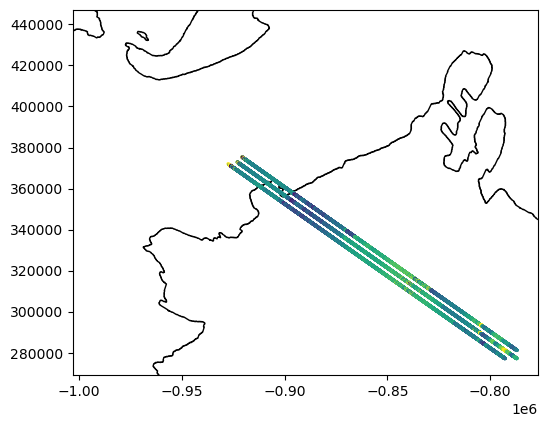

In [23]:
#7000 seconds for 113.

basemap = unpack.Basemap("BackgroundData/ATA_adm0.shp")
fig, ax = plt.subplots(1,1,figsize=(6,8))
basemap.basemap_gpd.plot(ax=ax, color="white", edgecolor="black")
#fullgdf.plot(ax=ax, column="rgt", markersize=2)
fullgdf.plot(ax=ax, column="slope", vmin = -0.01, vmax = 0.01, markersize=2)
plt.xlim(xlim[0]-abs(imbuffsc*(xlim[1]-xlim[0])), xlim[1]+abs(imbuffsc*(xlim[1]-xlim[0])))
plt.ylim(ylim[0]-abs(imbuffsc*(ylim[1]-ylim[0])), ylim[1]+abs(imbuffsc*(ylim[1]-ylim[0])))
plt.show()